---
## **Homework: Part 1**


- ### There is a generalized family of distributions called Gaussian Mixture Models GMMs (simply a sum of Gaussians), with a $pdf$ given by:

\begin{equation}
p(x) = \sum_{i=1}^{K} w_i \mathbb{N}(x|\mu_i, \sigma_i)
\end{equation}

Where:
1. $K$: is the number of Gaussians
2. $\mu_i, \sigma_i$: are the parameters of each Gaussian
3. $w_i$: is the coefficient (weight) of each Gaussian (mode)
<br>

- ### In order for the GMM to be a distribution the coefficents $w_i$, must sum to one:

\begin{equation}
\sum_{i=1}^{K}w_i = 1
\end{equation}

![Subdirectory Image](https://github.com/gtsagkatakis/Data-Science-and-Applications/blob/ee5a8decd5ca7b22312e1a34868526ea6c76b392/Images/gmm.png?raw=true')


<br><br>

## You are given a GMM model consisting of 3 Gaussians: $\mathbb{N}_1(0, 1), \mathbb{N}_2(-2, 0.5), \mathbb{N}_3(3, 2),$

1. #### Compute the $pdf$ of the GMM analytically using the libraries desribed above and plot the actual $pdfs$.
2. #### Assuming we are given the GMM model, sample from our model using the method we described above in a two-step way.
    First flip a $K$ sided coin to decide from which mode (Gaussian) we are sampling from

    Then, use the exact same trick we had above to samples from the specific Gaussian

    Plot the actual GMMs and the histogram of your samples for different sample sizes (e.g. $100, 1000, 10000$)

    Show that the histogram converges to the actual distribution

    **Hint:** You can use the numpy.random.choice() function and pass in the list of $w_i$ coefficients as the list of probabilities of each mode (Gaussian)


### 1: Analytical pdf of the GMM

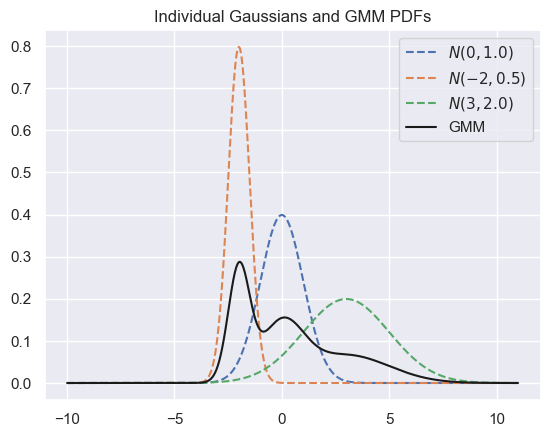

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

mu = np.array([0, -2, 3])
sigma = np.array([1, 0.5, 2])
w_i = np.array([1/3] * 3)

x = np.linspace(mu.min() - 4*sigma.max(), mu.max() + 4*sigma.max(), 1000)

def normal_pdf(x, μ, σ):
    return (1 / (np.sqrt(2 * np.pi) * σ)) * np.exp(-0.5 * ((x - μ) / σ) ** 2)

y = np.array([normal_pdf(x, μ, σ) for μ, σ in zip(mu, sigma)])

gmm = w_i @ y

plt.plot(x, y[0], label=f'$N({mu[0]}, {sigma[0]})$', linestyle='--')
plt.plot(x, y[1], label=f'$N({mu[1]}, {sigma[1]})$', linestyle='--')
plt.plot(x, y[2], label=f'$N({mu[2]}, {sigma[2]})$', linestyle='--')
plt.plot(x, gmm, label='GMM', color='k')
plt.title('Individual Gaussians and GMM PDFs')
plt.legend()
plt.show()

### 2: Sampling from the GMM

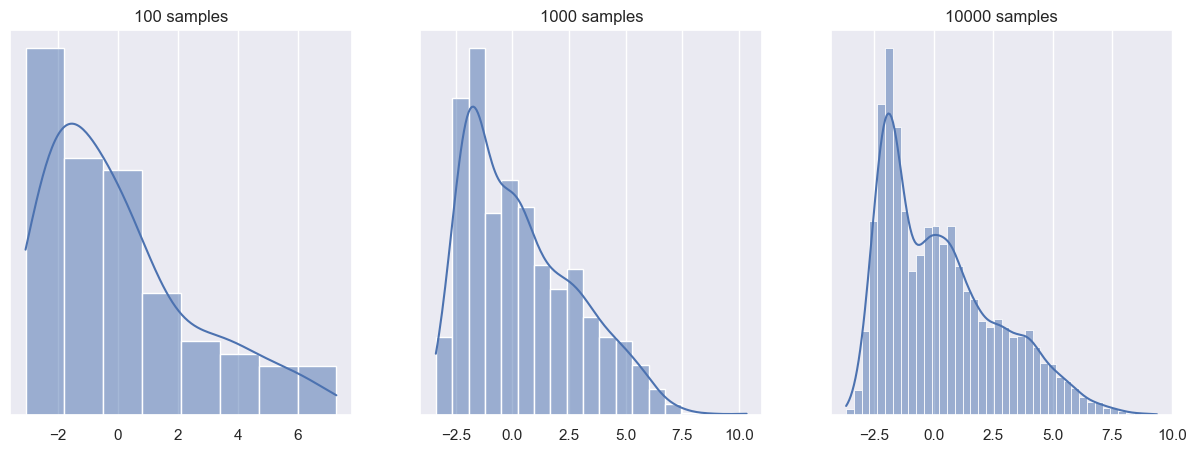

In [10]:
# Sample from the GMM and store the samples in np.vectors
n_samples = [100, 1000, 10000]
samples = [np.zeros(n) for n in n_samples]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, n in enumerate(n_samples):
    for j in range(n):
        z = np.random.choice(len(w_i), p=w_i)
        samples[i][j] = np.random.normal(mu[z], sigma[z])

    sns.histplot(samples[i], kde=True, ax=ax[i])
    ax[i].set_title(f'{n} samples')
    ax[i].set_yticks([])
    ax[i].set_ylabel('')

plt.show()

We can see that indeed as the number of samples grows, the histogram converges to the actual distribution of the GMM.

---
## **Homework: Part 2**

- #### Use the sklearn Breast Cancer Dataset we used and pick a different feature to analyze that you think is likely to be generated from an underlying Gaussian.

- #### That means you will be assuming that the distribution of the feature you choose is coming from a Gaussian parametrized by the vector:

\begin{equation}
\vec{\theta} = [\mu, \sigma]
\end{equation}

- #### Plot the Histogram of you feature, and the 0.05, 0.25, 0.5, 0.75, 0.95 p-values

- #### Calculate the mean and the std esimates of your feature vector

- #### Use the Maximum Likelihood Estimation we saw before to estimate the parameter vector and thus the Gaussian that best describes the feature vector you selected.

- #### One can easily estimate the Gaussian without the Maximum Likelihood Estimation by simply using the mean and std estimates we saw earlier. Use this simple derivation to compare against the MLE solution. These two should be the same

#### **Hints:** In this case you will have a function of both $\mu$ and $\sigma$. Get the partial derivatives of each one and set them to zero.


In [11]:

# Import modules/libraries
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt


# Get data
data = load_breast_cancer(as_frame=True).data

# Printing head and tail of data frame to get some first view
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1: Selecting and plotting a feature

In [12]:
((data - data.mean()) / data.std()).describe().loc['50%'].sort_values(ascending=False).rename('median').head()

mean smoothness    -0.034860
worst texture      -0.043477
worst smoothness   -0.046802
mean symmetry      -0.071564
mean texture       -0.104544
Name: median, dtype: float64

Hope that's not considered cheating :P, I'm trying to find the most likely 'gaussian-ish' feature without seeing distributions. These are the medians of the standardised features, so the feature with a median closest to 0 is likely to be the best choice, since it implies that this feature is the most symmetric around the mean. This feature is mean smoothness, however it was only examined in the example in class so I'm choosing worst texture.

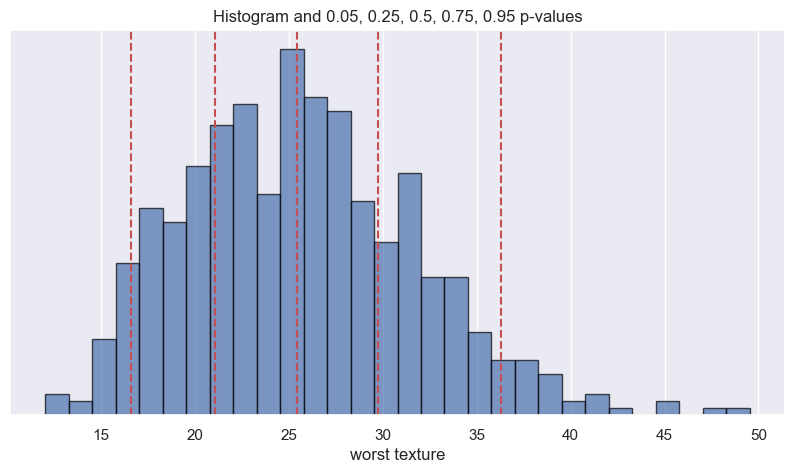

In [13]:
# Select a feature vector, plot its histogram and p-values with vertical axes
feature = 'worst texture'
X = data[feature]

p_i = [0.05, 0.25, 0.5, 0.75, 0.95]

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(X, bins=30, edgecolor='black', alpha=0.7, density=True)
ax.set_xlabel(feature)
ax.set_yticks([])
ax.set_title('Histogram and 0.05, 0.25, 0.5, 0.75, 0.95 p-values')

p_est = [np.percentile(X, p * 100) for p in p_i]

for p in p_i:
    ax.axvline(np.percentile(X, p * 100), linestyle='--', color='r')

plt.show()

Turns out this feature maybe wasn't the best choice, it seems a bit left-skewed but still is quite symmetric and close to a gaussian.

### 2: Calculating and plotting derived gaussian using the sample mean and std

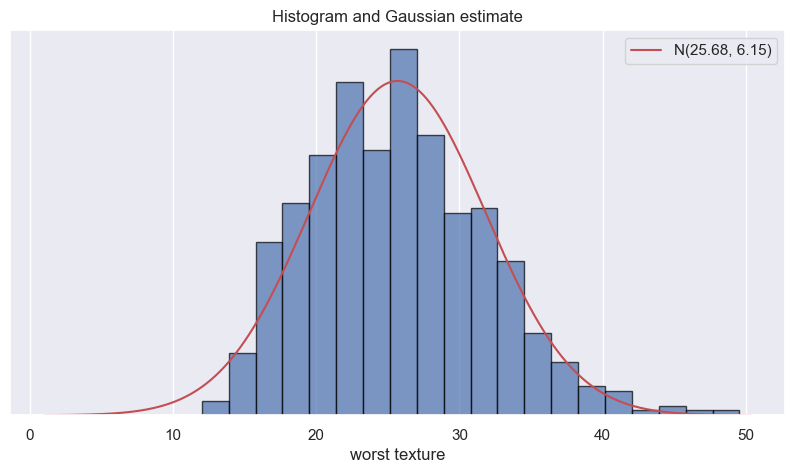

In [14]:
# Derive the Gaussian estimate by simply using the mean and std estimates and plot them against the histogram

μ, σ = X.mean(), X.std()
x = np.linspace(μ - 4*σ, μ + 4*σ, 1000)
y = normal_pdf(x, μ, σ)

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(X, bins=20, edgecolor='black', alpha=0.7, density=True)
ax.plot(x, y, color='r', label=f'N({μ:.2f}, {σ:.2f})')
ax.set_xlabel(feature)
ax.set_yticks([])
ax.set_title('Histogram and Gaussian estimate')
ax.legend()
plt.show()

As a result of the previous discussion, we can see that the left tail does not really fit to the estimated gaussian, however the rest of the distribution is quite close.

### 3: Calculating and plotting derived gaussian using MLE estimates

Maximum Likelihood Estimation for a Gaussian distribution $f(x;\vec{θ} = [μ, σ^2]) = \frac{1}{\sqrt{2πσ^2}}e^{-\frac{(x-μ)^2}{2σ^2}}$ is calculated as follows:

$$
L(\vec{θ}; x) = \prod_{i=1}^{n} f(x_i; \vec{θ}) = \prod_{i=1}^{n} \frac{1}{\sqrt{2πσ^2}}e^{-\frac{(x_i-μ)^2}{2σ^2}} = \frac{1}{(2πσ^2)^{n/2}}e^{-\frac{1}{2σ^2}\sum_{i=1}^{n}(x_i-μ)^2}
$$

$$
LL(\vec{θ}; x) = \log{L(\vec{θ}; x)} = -\frac{n}{2}\log{2π} - \frac{n}{2}\log{σ^2} - \frac{1}{2σ^2}\sum_{i=1}^{n}(x_i-μ)^2 = -\frac{n}{2}\log{2π} - \frac{n}{2}\log{σ^2} - \frac{1}{2σ^2}\sum_{i=1}^{n}(x_i-μ)^2 
$$

$$
\frac{d LL}{d μ} = \frac{1}{σ^2}\sum_{i=1}^{n}(x_i-μ) = 0 \Rightarrow \sum_{i=1}^{n}(x_i-μ) = 0 \Rightarrow \sum_{i=1}^{n}x_i - nμ = 0 \Rightarrow \hat{μ} = \frac{1}{n}\sum_{i=1}^{n}x_i
$$

$$
\frac{d LL}{d σ} = -\frac{n}{σ} + \frac{1}{σ^3}\sum_{i=1}^{n}(x_i-\hat{μ})^2 = 0 \Rightarrow \frac{1}{σ^3}\sum_{i=1}^{n}(x_i-\hat{μ})^2 = \frac{n}{σ} \Rightarrow σ^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i-\hat{μ})^2 \Rightarrow \hat{σ} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i-\hat{μ})^2}
$$


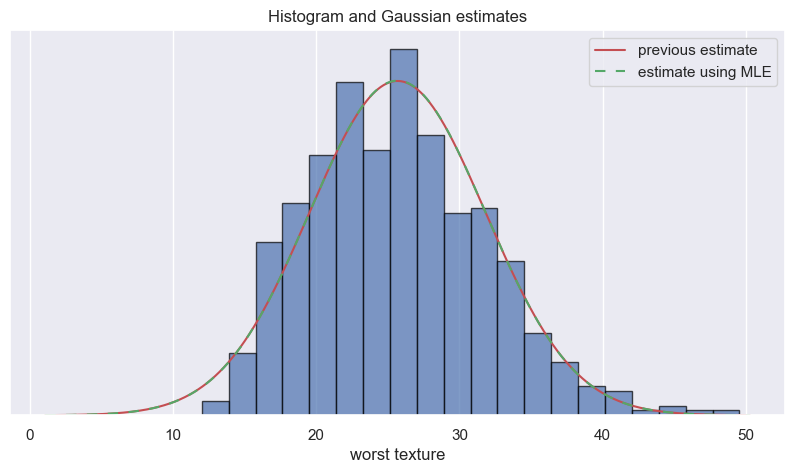

In [15]:
# Use the Maximum Likelihood Estimation (MLE) method to estimate the mean and std. Plot the new estimated Gaussian against the previous and the histogram (They should be the same)

n = len(X)
mu_hat = X.sum() / n
sigma_hat = np.sqrt(((X - mu_hat) ** 2).sum() / n)

x = np.linspace(μ - 4*σ, μ + 4*σ, 1000)
y = normal_pdf(x, μ, σ)
y_hat = normal_pdf(x, mu_hat, sigma_hat)

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(X, bins=20, edgecolor='black', alpha=0.7, density=True)
ax.plot(x, y, color='r', label='previous estimate')
ax.plot(x, y_hat, color='g', label='estimate using MLE', linestyle=(10, (5, 5)))
ax.set_xlabel(feature)
ax.set_yticks([])
ax.set_title('Histogram and Gaussian estimates')
ax.legend()
plt.show()

We can see the distributions are indeed the same, as expected. The formulas for the MLE estimates are exactly the ones for the sample mean and std respectively, anyway.